In [11]:
# import os
# import datetime

# import IPython
# import IPython.display
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# %matplotlib notebook
# %matplotlib inline
# import pywt
# import numpy as np
# import pandas as pd
# import seaborn as sns

# mpl.rcParams['figure.figsize'] = (8, 6)
# mpl.rcParams['axes.grid'] = False

# from sklearn.model_selection import cross_val_predict
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from sklearn.neural_network import MLPClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
# from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split
# from sklearn.metrics import r2_score

# import scipy.stats as ss

# import scipy.io as sio
# import math
# import sys
# !{sys.executable} -m pip install siml
# from siml.sk_utils import *
# from siml.signal_analysis_utils import *
# import sys
# !{sys.executable} -m pip install sensormotion
# import sensormotion as sm
# # import sys
# # !{sys.executable} -m pip install tensorflow
# # import tensorflow as tf
# from scipy.fftpack import fft
# from scipy.signal import welch

# import time
# import datetime as dt
# from collections import defaultdict, Counter

# import warnings
# warnings.filterwarnings("ignore")

'C:\Users\InfiniGru' is not recognized as an internal or external command,
operable program or batch file.
'C:\Users\InfiniGru' is not recognized as an internal or external command,
operable program or batch file.


In [22]:
import os
import numpy as np
import pandas as pd
import scipy.io as sio
import scipy.stats
import math
from siml.sk_utils import *
from siml.signal_analysis_utils import *
import sensormotion as sm
from scipy.fftpack import fft
from scipy.signal import welch

from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import pywt

import time
import datetime as dt
from collections import defaultdict, Counter

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split

import warnings
warnings.filterwarnings("ignore")

In [14]:
train_time_series = pd.read_csv("C:\\Users\\InfiniGru Dell\\Documents\\GitHub\\EdX-Python-for-Research\\Final Project\\train_time_series.csv")
train_time_series.head()
train_time_series.shape

(3744, 7)

In [15]:
time_stamp = train_time_series["timestamp"]
x = train_time_series["x"]
y = train_time_series["y"]
z = train_time_series["z"]

In [16]:
train_labels = pd.read_csv("C:\\Users\\InfiniGru Dell\\Documents\\GitHub\\EdX-Python-for-Research\\Final Project\\train_labels.csv")
train_labels.head()
train_labels.shape

(375, 4)

In [18]:
#combine 3 axes components in training and test time series into a 4th component of combined magnitude by taking a square root of summation of their squares: sqrt(x^2+y^2+z^2)
def combine(axis):
    return (axis['x']**2+axis['y']**2+axis['z']**2)**0.5

In [19]:
train_time_series['w'] = combine(train_time_series)
train_time_series.head()

,Unnamed: 0,timestamp,UTC time,accuracy,x,y,z,w
0,20586,1565109930787,2019-08-06T16:45:30.787,unknown,-0.006485,-0.934860,-0.069046,0.937429
1,20587,1565109930887,2019-08-06T16:45:30.887,unknown,-0.066467,-1.015442,0.089554,1.021548
2,20588,1565109930987,2019-08-06T16:45:30.987,unknown,-0.043488,-1.021255,0.178467,1.037644
3,20589,1565109931087,2019-08-06T16:45:31.087,unknown,-0.053802,-0.987701,0.068985,0.991568
4,20590,1565109931188,2019-08-06T16:45:31.188,unknown,-0.054031,-1.003616,0.126450,1.012993


In [20]:
pd.DataFrame.from_dict(Counter(train_labels['label']), orient="index", columns=['label']).reset_index()

,index,label
0,1,27
1,2,213
2,4,47
3,3,88


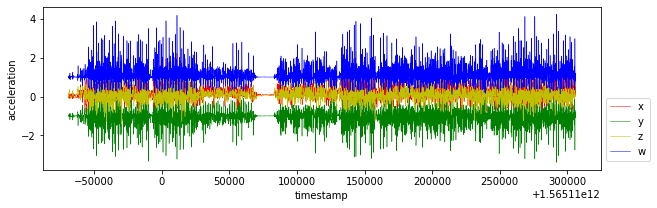

In [36]:
#Time-series data visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.plot(train_time_series['timestamp'], train_time_series['x'], linewidth=0.5, color='r', label='x')
plt.plot(train_time_series['timestamp'], train_time_series['y'], linewidth=0.5, color='g', label='y')
plt.plot(train_time_series['timestamp'], train_time_series['z'], linewidth=0.5, color='y', label='z')
plt.plot(train_time_series['timestamp'], train_time_series['w'], linewidth=0.5, color='b', label='w')
plt.xlabel('timestamp')
plt.ylabel('acceleration')
plt.legend(loc='center left' ,bbox_to_anchor = [1,.25])

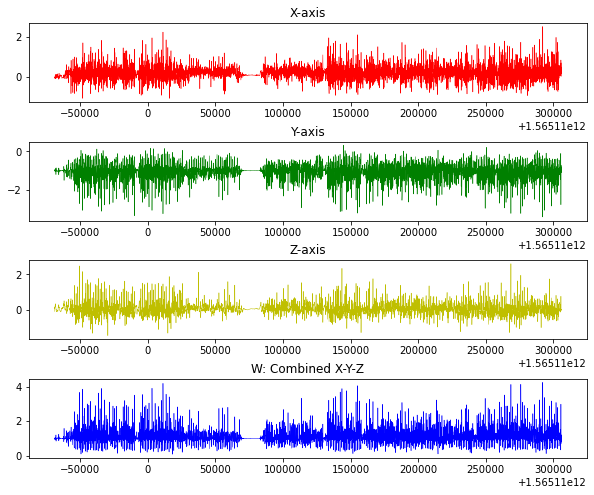

In [38]:
#Each axis data visualization
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10,8))

ax[0].set_title('X-axis')
ax[0].plot(train_time_series['timestamp'], train_time_series['x'], linewidth=0.5, color='r')

ax[1].set_title('Y-axis')
ax[1].plot(train_time_series['timestamp'], train_time_series['y'], linewidth=0.5, color='g')

ax[2].set_title('Z-axis')
ax[2].plot(train_time_series['timestamp'], train_time_series['z'], linewidth=0.5, color='y')

ax[3].set_title('W: Combined X-Y-Z')
ax[3].plot(train_time_series['timestamp'], train_time_series['w'], linewidth=0.5, color='b')

fig.subplots_adjust(hspace=.5)

In [40]:
#Label activity by combining data from x,y,z,w and timestamp data
df = pd.concat([train_time_series, train_labels['label']],axis=1).dropna()
col = ['timestamp','x','y','z','w','label']

standing = df[col][df.label == 1]
walking  = df[col][df.label == 2]
stairs_down  = df[col][df.label == 3]
stairs_up  = df[col][df.label == 4]
print(standing)

         timestamp         x         y         z         w  label
0    1565109930787 -0.006485 -0.934860 -0.069046  0.937429    1.0
1    1565109930887 -0.066467 -1.015442  0.089554  1.021548    1.0
2    1565109930987 -0.043488 -1.021255  0.178467  1.037644    1.0
3    1565109931087 -0.053802 -0.987701  0.068985  0.991568    1.0
4    1565109931188 -0.054031 -1.003616  0.126450  1.012993    1.0
5    1565109931288 -0.010880 -0.967575  0.170898  0.982612    1.0
6    1565109931388  0.052841 -0.982330  0.235565  1.011561    1.0
7    1565109931488  0.032974 -1.053207  0.256714  1.084544    1.0
8    1565109931589 -0.090424 -0.972794  0.356308  1.039932    1.0
134  1565109944217  0.251633 -0.902237  0.415604  1.024733    1.0
135  1565109944318  0.231903 -0.969711  0.576355  1.151653    1.0
136  1565109944418 -0.022522 -1.067780 -0.367599  1.129509    1.0
137  1565109944518 -0.782913 -0.641159 -0.065033  1.014035    1.0
138  1565109944618  0.890350 -1.127716  0.014160  1.436895    1.0
139  15651

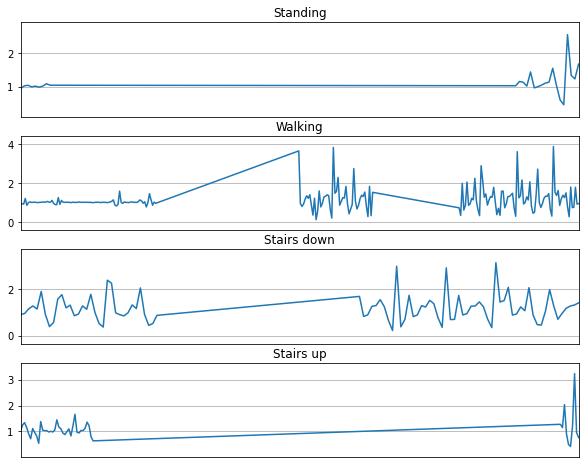

In [49]:
#Activity data visualization

def plot_axis(axis, x, y, title):
    axis.plot(x, y)
    axis.set_title(title)
    axis.xaxis.set_visible(False)
    axis.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    axis.set_xlim([min(x), max(x)])
    axis.grid(True)
    
def plot_activity(activities, titles):
    fig, axs = plt.subplots(nrows=len(activities), figsize=(10, 8))
    for i in range(0, len(activities)):
        plot_axis(axs[i], activities[i]['timestamp'], activities[i]['w'], titles[i])
    plt.subplots_adjust(hspace=0.2)
    plt.show()

plot_activity([standing, walking, stairs_down, stairs_up],
              ['Standing', 'Walking', 'Stairs down', 'Stairs up'])